##### 5. Model Selection & Model Training

In [63]:
# import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

In [64]:
# load the data
df = pd.read_csv('data/seeds_dataset.csv')


In [65]:
#droping the unwanted columns
df.drop(['Unnamed: 8','Unnamed: 9'],axis=1,inplace=True)

In [66]:
# separate the features and target variable
X = df.drop('Class (1, 2, 3)', axis=1)
y = df['Class (1, 2, 3)']

In [67]:
# Normalize and Scale the data using MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)


# Print the normalized and scaled data
print("Normalized data: \n", X)


Normalized data: 
 [[0.44098206 0.50206612 0.5707804  ... 0.48610121 0.18930164 0.34515017]
 [0.40509915 0.44628099 0.66243194 ... 0.50106914 0.03288302 0.21516494]
 [0.34938621 0.34710744 0.87931034 ... 0.50392017 0.25145302 0.1506647 ]
 ...
 [0.24645892 0.25826446 0.7277677  ... 0.42908054 0.98166664 0.26440177]
 [0.11803588 0.16528926 0.39927405 ... 0.14682823 0.36834441 0.25849335]
 [0.16147309 0.19214876 0.54718693 ... 0.24518888 0.63346292 0.26784835]]


In [68]:
# Split the dataset into features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a list of models
models = [LogisticRegression(solver='lbfgs', max_iter=1000), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(),
          GradientBoostingClassifier(), SVC(), KNeighborsClassifier(), AdaBoostClassifier(),
          LGBMClassifier(), CatBoostClassifier(), BaggingClassifier(), ExtraTreesClassifier()]

# Define a list of model names
model_names = ["LogisticRegression", "GaussianNB", "DecisionTree", "RandomForest", "GradientBoosting", "SVM",
               "KNN", "AdaBoost", "LightGBM", "CatBoost", "Bagging", "ExtraTrees"]

# Iterate over the models
for model, model_name in zip(models, model_names):
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    

Learning rate set to 0.072246
0:	learn: 1.0120798	total: 2.46ms	remaining: 2.46s
1:	learn: 0.9468313	total: 4.67ms	remaining: 2.33s
2:	learn: 0.8982289	total: 7.31ms	remaining: 2.43s
3:	learn: 0.8485548	total: 10.2ms	remaining: 2.55s
4:	learn: 0.7979453	total: 12.3ms	remaining: 2.45s
5:	learn: 0.7553004	total: 14.2ms	remaining: 2.35s
6:	learn: 0.7147178	total: 15.2ms	remaining: 2.16s
7:	learn: 0.6796198	total: 17ms	remaining: 2.11s
8:	learn: 0.6518506	total: 18.8ms	remaining: 2.07s
9:	learn: 0.6236531	total: 21.3ms	remaining: 2.1s
10:	learn: 0.5923351	total: 24.1ms	remaining: 2.16s
11:	learn: 0.5654142	total: 25.9ms	remaining: 2.13s
12:	learn: 0.5419464	total: 27.7ms	remaining: 2.1s
13:	learn: 0.5202442	total: 29.5ms	remaining: 2.08s
14:	learn: 0.4962665	total: 31.3ms	remaining: 2.06s
15:	learn: 0.4771880	total: 33.1ms	remaining: 2.03s
16:	learn: 0.4588136	total: 34.9ms	remaining: 2.02s
17:	learn: 0.4443708	total: 37.8ms	remaining: 2.06s
18:	learn: 0.4301829	total: 39.9ms	remaining: 2.

In [69]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((168, 7), (42, 7))

In [70]:
results = []
for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    result = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    results.append(result)

zip_file = zip(models, results)


for model, result in zip(models, results):
        y_pred = model.predict(X_test)
        np.seterr(divide='ignore', invalid='ignore')
        precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
        print(f'{model.__class__.__name__} - precision: {precision:.2f}, recall: {recall:.2f}, fscore: {fscore:.2f}')

LogisticRegression - precision: 0.90, recall: 0.90, fscore: 0.90
GaussianNB - precision: 0.86, recall: 0.86, fscore: 0.86
DecisionTreeClassifier - precision: 0.88, recall: 0.88, fscore: 0.88
RandomForestClassifier - precision: 0.85, recall: 0.83, fscore: 0.84
GradientBoostingClassifier - precision: 0.96, recall: 0.95, fscore: 0.95
SVC - precision: 0.91, recall: 0.90, fscore: 0.91
KNeighborsClassifier - precision: 0.93, recall: 0.93, fscore: 0.93
AdaBoostClassifier - precision: 0.44, recall: 0.60, fscore: 0.48
LGBMClassifier - precision: 0.91, recall: 0.90, fscore: 0.91
CatBoostClassifier - precision: 0.88, recall: 0.86, fscore: 0.86
BaggingClassifier - precision: 0.88, recall: 0.88, fscore: 0.88
ExtraTreesClassifier - precision: 0.91, recall: 0.90, fscore: 0.91


c:\Users\HP\Downloads\WheatKernel\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HP\Downloads\WheatKernel\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Learning rate set to 0.072246
0:	learn: 1.0120798	total: 4.16ms	remaining: 4.16s
1:	learn: 0.9468313	total: 6.89ms	remaining: 3.44s
2:	learn: 0.8982289	total: 11.6ms	remaining: 3.87s
3:	learn: 0.8485548	total: 14.2ms	remaining: 3.55s
4:	learn: 0.7979453	total: 16.8ms	remaining: 3.34s
5:	learn: 0.7553004	total: 19.1ms	remaining: 3.17s
6:	learn: 0.7147178	total: 20.5ms	remaining: 2.91s
7:	learn: 0.6796198	total: 22.9ms	remaining: 2.84s
8:	learn: 0.6518506	total: 28.8ms	remaining: 3.17s
9:	learn: 0.6236531	total: 31.2ms	remaining: 3.09s
10:	learn: 0.5923351	total: 33.8ms	remaining: 3.04s
11:	learn: 0.5654142	total: 36.3ms	remaining: 2.99s
12:	learn: 0.5419464	total: 38.9ms	remaining: 2.96s
13:	learn: 0.5202442	total: 47.2ms	remaining: 3.32s
14:	learn: 0.4962665	total: 63.5ms	remaining: 4.17s
15:	learn: 0.4771880	total: 68.8ms	remaining: 4.23s
16:	learn: 0.4588136	total: 78ms	remaining: 4.51s
17:	learn: 0.4443708	total: 80.5ms	remaining: 4.39s
18:	learn: 0.4301829	total: 83.2ms	remaining: 

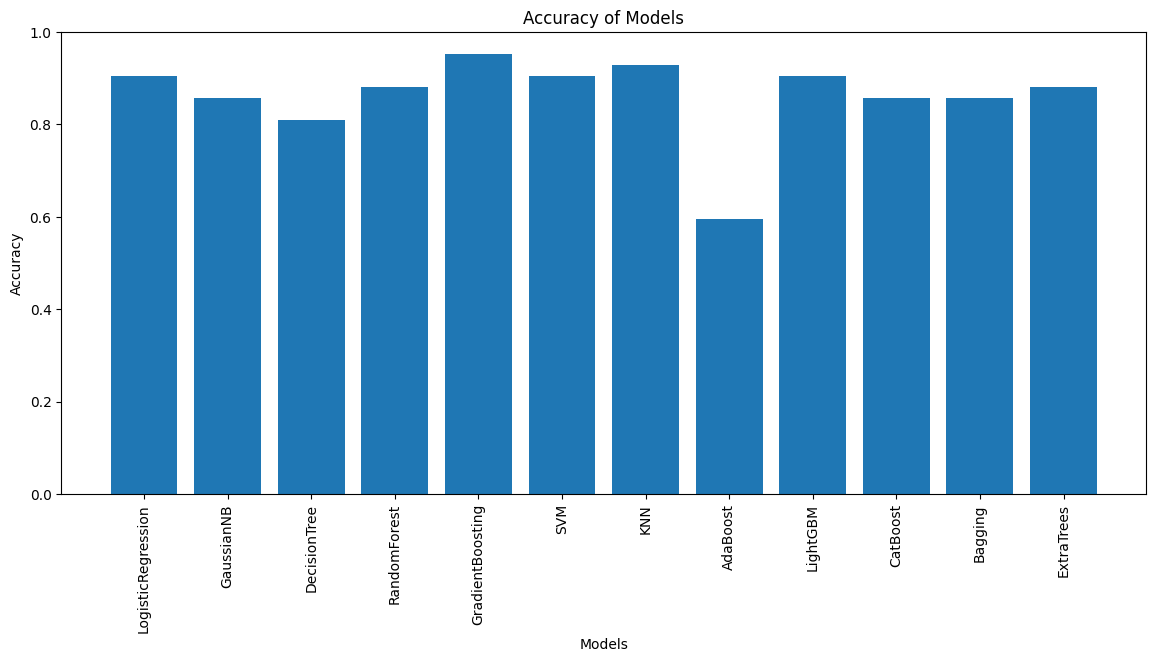

In [71]:
plt.figure(figsize=(14,6))


# Iterate over the models
accuracies = []
for model, model_name in zip(models, model_names):
    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Predict the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Create the bar chart
plt.bar(model_names, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.xticks(rotation=90)
plt.show()


Learning rate set to 0.072246
0:	learn: 1.0120798	total: 3.35ms	remaining: 3.34s
1:	learn: 0.9468313	total: 7.54ms	remaining: 3.76s
2:	learn: 0.8982289	total: 10.2ms	remaining: 3.4s
3:	learn: 0.8485548	total: 12.7ms	remaining: 3.17s
4:	learn: 0.7979453	total: 15.5ms	remaining: 3.08s
5:	learn: 0.7553004	total: 18ms	remaining: 2.98s
6:	learn: 0.7147178	total: 19.5ms	remaining: 2.77s
7:	learn: 0.6796198	total: 24.7ms	remaining: 3.06s
8:	learn: 0.6518506	total: 27.2ms	remaining: 3s
9:	learn: 0.6236531	total: 29.8ms	remaining: 2.95s
10:	learn: 0.5923351	total: 32.6ms	remaining: 2.93s
11:	learn: 0.5654142	total: 36.2ms	remaining: 2.98s
12:	learn: 0.5419464	total: 39.1ms	remaining: 2.97s
13:	learn: 0.5202442	total: 41.5ms	remaining: 2.92s
14:	learn: 0.4962665	total: 44ms	remaining: 2.89s
15:	learn: 0.4771880	total: 46.4ms	remaining: 2.86s
16:	learn: 0.4588136	total: 49ms	remaining: 2.83s
17:	learn: 0.4443708	total: 53.9ms	remaining: 2.94s
18:	learn: 0.4301829	total: 56.3ms	remaining: 2.9s
19:

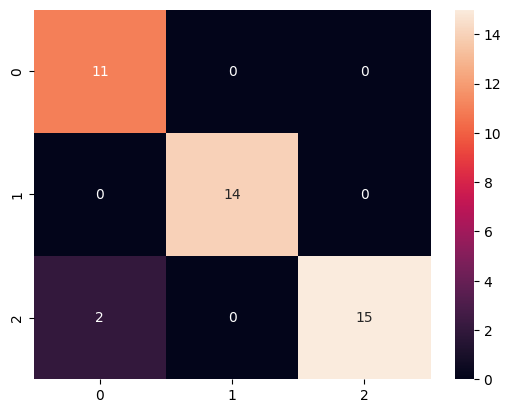

In [72]:
# Initialize variables to store precision and model name
highest_precision = 0
best_model_name = ''

# Iterate over the models
for model, model_name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    if precision > highest_precision:
        highest_precision = precision
        best_model_name = model_name
        best_model = model

# create a confusion matrix for the best model
cm = confusion_matrix(y_test, best_model.predict(X_test))
print(f'{best_model_name} - confusion matrix:')
print(cm)
sns.heatmap(cm,annot=True,fmt='d')
plt.show()


##### Difference between Actual and Predicted Values

In [73]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
30,1,1,0
172,3,3,0
84,2,2,0
199,3,1,2
60,1,3,-2
155,3,3,0
45,1,1,0
182,3,3,0
9,1,1,0
196,3,3,0
